# Collection of First Runs on Dwave Pegasus

In this notebook, I  first explore the Pegasus topology, and later attempt to run several anneals. 

------- explanation -------

The dwave token (my token) is setup as a default for my personal laptop, i.e. running some parts of this notebook on a different device will require to provide your own token.


In [397]:
import numpy as np
import matplotlib.pyplot as plt
import dwave_networkx as dnx
from dwave.system.samplers import DWaveSampler

In [5]:
dwave_sampler_pegasus = DWaveSampler(solver={'topology__type': 'pegasus'})
props_pegasus = dwave_sampler_pegasus.properties

# Get total qubits - should be 24 * N * (N - 1)
total_qubits = props_pegasus['num_qubits']
print('total qbits = ', total_qubits)

# Get total number of inactive qubits
total_inactive = [i for i in range(total_qubits) if i not in dwave_sampler_pegasus.nodelist]
print('total inactive qbits = ', len(total_inactive))

# another way to compute the number of active qubits
active_qubits = dwave_sampler_pegasus.solver.num_active_qubits
print('active qbits, another way = ', active_qubits)

# This should convert the known inactive qubit indices to Pegasus coordinates.
inactive_pegasus_coord = [dnx.pegasus_coordinates(16).linear_to_pegasus(k) for k in total_inactive]
print('inactive qbits cords', inactive_pegasus_coord)

total qbits =  5760
total inactive qbits =  133
active qbits, another way =  5627
inactive qbits cords [(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 0, 2), (0, 0, 0, 3), (0, 0, 0, 4), (0, 0, 0, 5), (0, 0, 0, 6), (0, 0, 0, 7), (0, 0, 0, 8), (0, 0, 0, 9), (0, 0, 0, 10), (0, 0, 0, 11), (0, 0, 0, 12), (0, 0, 0, 13), (0, 0, 0, 14), (0, 0, 1, 0), (0, 0, 1, 1), (0, 0, 1, 2), (0, 0, 1, 3), (0, 0, 1, 4), (0, 0, 1, 5), (0, 0, 1, 6), (0, 0, 1, 7), (0, 0, 1, 8), (0, 0, 1, 9), (0, 0, 1, 10), (0, 0, 1, 11), (0, 0, 1, 12), (0, 0, 1, 13), (0, 0, 1, 14), (0, 3, 0, 2), (0, 6, 8, 10), (0, 7, 5, 3), (0, 11, 5, 0), (0, 15, 10, 0), (0, 15, 10, 1), (0, 15, 10, 2), (0, 15, 10, 3), (0, 15, 10, 4), (0, 15, 10, 5), (0, 15, 10, 6), (0, 15, 10, 7), (0, 15, 10, 8), (0, 15, 10, 9), (0, 15, 10, 10), (0, 15, 10, 11), (0, 15, 10, 12), (0, 15, 10, 13), (0, 15, 10, 14), (0, 15, 11, 0), (0, 15, 11, 1), (0, 15, 11, 2), (0, 15, 11, 3), (0, 15, 11, 4), (0, 15, 11, 5), (0, 15, 11, 6), (0, 15, 11, 7), (0, 15, 11, 8), (0, 15, 11, 9), (0,

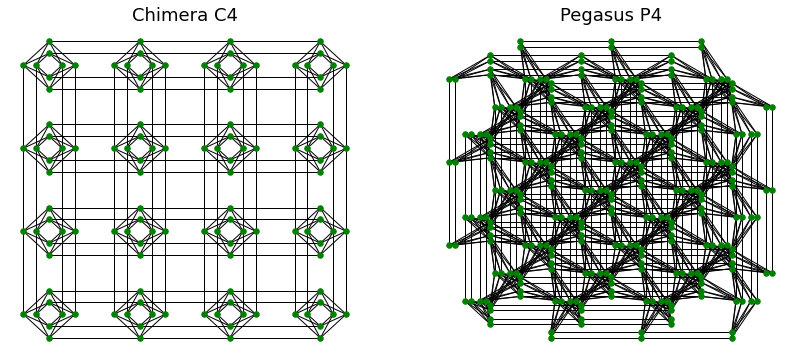

In [119]:
%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize=(14,6))

dnx.draw_chimera(dnx.chimera_graph(4), ax=ax[0], node_size=30, node_color='g')
ax[0].set_title('Chimera C4', fontsize=18)

dnx.draw_pegasus(dnx.pegasus_graph(4), ax=ax[1], node_size=30, node_color='g')
ax[1].set_title('Pegasus P4', fontsize=18)

plt.savefig('chimera_pegasus_4.png',dpi=300)

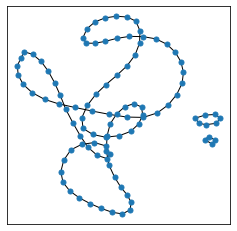

In [10]:
from embed_by_dwave import random_graph
import networkx as nx
import dimod 

G = random_graph(nodes=100, edges=2)

In [13]:
from embed_by_dwave import try_embedding
import minorminer

chimera_full = dnx.chimera_graph(16)
pegasus_full = dnx.pegasus_graph(16)

topologies_full = {'Chimera': chimera_full, 'Pegasus': pegasus_full}

try_embedding(source_graph=G, target_graphs=topologies_full, timeout=20, tries=2)

Chimera: found embedding with longest chain of 2 qubits.
Pegasus: found embedding with longest chain of 1 qubits.


{'Chimera': 2, 'Pegasus': 1}


Problem 1 of 2 for 10 nodes and 5 edges:


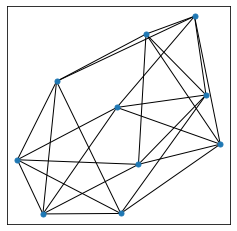

Chimera: found embedding with longest chain of 3 qubits.
Pegasus: found embedding with longest chain of 2 qubits.

Problem 2 of 2 for 10 nodes and 5 edges:


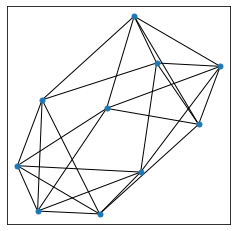

Chimera: found embedding with longest chain of 3 qubits.
Pegasus: found embedding with longest chain of 2 qubits.


[[10, 5, 0, {'Chimera': 3, 'Pegasus': 2}],
 [10, 5, 1, {'Chimera': 3, 'Pegasus': 2}]]

In [15]:
from embed_by_dwave import embedding_loop
import pandas as pd

embedding_loop(nodes=10,   # Additional configuration parameters are demonstrated below
               edges=5, 
               target_graphs=topologies_full)  

In [16]:
import os

from dwave.system.samplers import DWaveSampler
from dwave.cloud.exceptions import *

try:
    qpu_advantage = DWaveSampler(solver={'topology__type': 'pegasus'})
    qpu_2000q = DWaveSampler(solver={'topology__type': 'chimera'})
    
    qpus = {'Advantage': qpu_advantage, 'DW-2000Q': qpu_2000q}

    print("Connected to Advantage {} and 2000Q {}.".format(qpu_advantage.solver.id, qpu_2000q.solver.id))
except SolverNotFoundError:
    print("Currently a pair of solvers are unavailable for sections comparing QPU technologies. Try those examples later.")

Connected to Advantage Advantage_system4.1 and 2000Q DW_2000Q_6.


In [18]:
for qpu in qpus:
    topology = pegasus_full if qpu=="Advantage" else chimera_full
    qpu_yield = 100-round(100*(len(topology.nodes) - len(qpus[qpu].nodelist))/len(topology.nodes), 2)
    
    print("{} has a working graph with {}% yield.".format(qpus[qpu].solver.name, qpu_yield))

Advantage_system4.1 has a working graph with 99.77% yield.
DW_2000Q_6 has a working graph with 99.66% yield.


# Schedule

 1. Run Max-norm & EVM anneal separately
 
 2. Run PAPR
 
 3. Run together



## Minimising EVM:

After the message $\mathbf{s}$ is precoded into the precoded vector $\mathbf{x}$, we wirelessly transmit $F^\dagger\mathbf{x}$. This signal picks up environenmental artifacts, modeled by the channel matrix $H$ and so the received signal is a convolution of $H$ and the transmitted signal. After the reciever applies DFT, it reads $H\mathbf{x}$. As $H$ should only model the multipath environment, we may also model-in additional Gaussian noise $\mathbf{n}$ to the recieved vector, i.e. the reciver reads:

\begin{equation}
    H\mathbf{x} + \mathbf{n}
\end{equation}

We would like this to be as similar to the original $\mathbf{s}$ as possible, hence minimising:

\begin{equation}
    \Vert H\mathbf{x} + \mathbf{n} - \mathbf{s}\Vert_2^2
\end{equation}

In [256]:
def Channel_Rayleigh(no_users, no_transmit, scale=None):
    """Returns a random, complex Rayleigh fading wireles channel 
    matrix of size (no_users, no_transmit). 
    
    'no_users = NK and no_transmit = NM', but N can really be set to 1.
    
    NOTE: For testing, specify seed globally when calling this.
    """
    
    if scale is None:
        scale = 1
    else:
        None
    
    re_H = np.random.rayleigh(scale, (no_users, no_transmit))
    im_H = np.random.rayleigh(scale, (no_users, no_transmit))
    
    H = re_H + im_H*1J
    
    return H

def Gauss_noise(length, scale=None):
    
    if scale is None:
        scale=0.1
    else:
        None
    
    noise_re = np.random.normal(loc = 0, scale = np.sqrt(scale/2), size = (length,))
    noise_im = np.random.normal(loc = 0, scale = np.sqrt(scale/2), size = (length,))
    
    noise = noise_re + noise_im * 1j
    
    return noise


## We only need the coeffs.

In [398]:
## END GOAL: create class for coeffs. for user requested EVM size

def Get_EVM_coeffs(s):

    
    
    return coeffs

## Max-norm 

Minimising the max-norm can be written as the linear program:

\begin{align*}
    &\text{minimise }\;\; \mu \\
    &\text{s.t. }\;\; \alpha_j^2 + \beta_j^2 \leq \mu, \;\; \forall j=1,\dots, L
\end{align*}

where $\alpha_j$ is the real and $\beta_j$ the imaginary part of $y_j$, which is the time-domain of the precoded vector $\mathbf{x}$. The minimisation variable $\mu$ is given in a binary expansion as:

\begin{equation}
    \mu = \sum_{l=-r_\mu}^{r_\mu}2^{p^{(\mu)}_l}q_l.
\end{equation}

<!-- Notice that $\mu$ is now strictly positive and we can construct it in the following way. Suppose we want it to lie within $\mu\in [0, \mu_{max})$ and have $2n$ available qubits to to represent it with. Then, we approximate $\mu$ as:

\begin{equation}
    \mu = \sum_{l=-}^{r_\mu}2^{p^{(\mu)}_l}q_l.
\end{equation} -->

In [399]:
# upper bounary a power of 2 only
# expect nq+1 qubits

def Get_mu_coeff(mu_max, nq):
    """
    Works best for mu_max being a power of 2.
    """
    
    p_max = int(np.log2(mu_max) - 1)
    sub = int(nq/2) - p_max
    
    powers = np.linspace(-int(nq/2), int(nq/2), nq+1, dtype=int)
    powers = powers - sub
    
    coeff = 2*np.ones(nq+1)
    coeff = np.power(coeff, powers)
    
    upper = np.sum(coeff)
    
    return coeff, upper

# format(6, '01b')
# int(f'{5:03b}')
print(Get_mu_coeff(4,6))


(array([0.03125, 0.0625 , 0.125  , 0.25   , 0.5    , 1.     , 2.     ]), 3.96875)


Any other ancillary variable can be added via the above function.

The precoded vector $\mathbf{x}$ is likewise represented as an array of coeffciecients. 

For an $L$-long $\mathbf{x}$, we cerate an $2L$-long array: $[\Re(\mathbf{x}), \Im(\mathbf{x})]$, where each of the entries has the same range:

\begin{align}
    a_j \bigg/ b_j = \sum_{k=0}^{r_x}2^{p^{(x)}_k}q_k - c_xq_{r_x+1}.
\end{align}

which determines $c_x$ and $p^{(x)}$. 

The approach is almost identical as for $\mu$ coefficients. We assume that the domain of $\mathbf{x}$ is dependent on the size of the QAM constellation. 

First, determine the size of the QUBO matrix.


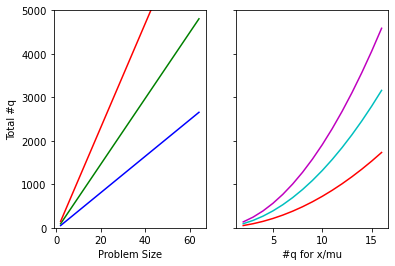

In [400]:
def Max_norm_q_count(problem_size, x_nq, mu_nq):
    qtot = (x_nq + 1)*(problem_size*(5*x_nq + 4) - 4*(x_nq + 1)) + 2*mu_nq
    return qtot


L = np.linspace(2,64, 63)
x_nq = np.linspace(2,16,15)
mu_nq = np.linspace(2,16,15)

cs = ['b','g','r','c','m','k']

%matplotlib inline


fig, (ax1, ax2) = plt.subplots(1, 2)
for i in range(0,3):
    ax1.plot(L,Max_norm_q_count(L,x_nq[i],x_nq[i]),c=cs[i])
    ax2.plot(x_nq,Max_norm_q_count(L[i],x_nq,x_nq),c=cs[i+2])
ax1.set_ylim(0,5000)
ax1.set_xlabel('Problem Size')
ax1.set_ylabel('Total #q')

ax2.set_ylim(0,5000)
# ax2.set_ticklabels([])
ax2.axes.yaxis.set_ticklabels([])
ax2.set_xlabel('#q for x/mu')

plt.show()


In [401]:
from scipy import optimize

print(Max_norm_q_count(L[10], x_nq[2],x_nq[2]))

def best(x):
    L, x_nq = x
    return (Max_norm_q_count(L,x_nq,x_nq) - 5000)**2


resbrute = optimize.brute(best, ((2,64),(2,4)), full_output=True)

print(resbrute[0])
print(resbrute[1])

1348.0
[43.01701214  3.96604324]
3.0236442556626215e-16


In [402]:
%matplotlib inline
def Get_x_coeff(domain, size, nq):
    
    low, high = domain
    nq = nq - 2
    p_max = int(np.log2(high) - 1)
    sub = int(nq/2) - p_max
#     print(sub)
    
    powers = np.linspace(-int(nq/2), int(nq/2), nq+1, dtype=int)
#     print(powers)
    powers = powers - sub
    
    coeff = 2*np.ones(nq+1)
    coeff = np.power(coeff, powers)
    
    upper = np.sum(coeff)
    
    c = -(upper - low)
    
    # now coeff is an array of coeffs for a single element of x.
    coeff = np.append(coeff,c)
    
    # but we have 'size' of them
    coeff = np.tile(coeff, (size, 1))
    
    return coeff, upper


x_qubits = Get_x_coeff([-4,4], 2, 4)[0]
print(x_qubits)

[[ 0.5  1.   2.  -7.5]
 [ 0.5  1.   2.  -7.5]]


### L2 Norm

The l2 norm reads:

\begin{align}
    \Vert\mathbf{x}\Vert_2^2&= \sum_{n}^L(a_n^2+b_n^2)\nonumber\\
    &=\sum_{k=0}^{r}2^{2p_k}\sum_n^L(q_{a_n,k}+q_{b_n,k}) + \sum_n^L\sum_{k=0}^{r}\sum_{k<l}2^{p_k+p_l}(q_{a_n,k}q_{a_n,l}+q_{b_n,k}q_{b_n,l}) \nonumber\\
    &\quad - 2c\sum_n^L\left((q_{a_n,r+1}+q_{b_n,r+1})\sum_{k=0}^{r}2^{p_k}(q_{a_n,k}+q_{b_n,k})\right)+ c^2\sum_n^L(q_{a_n,r+1}+q_{b_n,r+1})
\end{align}


In [403]:
def Get_L2_QUBO_Coeff(x):
    """
    Given an array 'x' of coefficients of the real and imaginarry parts of x,
    return the QUBO coefficients as a 2D array (QUBO matrix).
    """
    
    # each row of input x should be coeffs of single a/b
    # so the QUBO matrix should be len(row)*num. rows
    num_q = len(x[0])
    Q_size = len(x)*num_q
    
    Q_mat = np.zeros((Q_size,Q_size))
    
    # 1st order terms - biases go on diagonal
    # compute diag for a single row, as they are all the same
    num_pos = num_q - 1
    
    diag = np.power(x[:],2)
    diag = np.tile(diag, Q_size)
    
    # inserting them on the diag
    np.fill_diagonal(Q_mat,diag)
    
    # 2nd order terms:
    
    
    
    return Q_mat

Qmat = Get_L2_QUBO_Coeff(x_qubits)

print(np.diag(Qmat))


[ 0.25  1.    4.   56.25  0.25  1.    4.   56.25]


In [404]:
import sympy as sp

q_a = sp.symbols('qa:5')
nq=3
varname = 'qbit'
q_b = sp.symbols('{}:{}'.format(varname,nq))

print(q_a)
print(q_b)

# TODO: make b**2=b for all symbols.
print(q_b[0]**2)


# s = sp.Sum(sp.Indexed('q_a',i),(i,0,4))
# s = sp.Sum(q_a[i], (i,0,2)).doit()

s = sp.Add(*[2**(m-4)*q_a[m] for m in range(5)])
print(s)


(qa0, qa1, qa2, qa3, qa4)
(qbit0, qbit1, qbit2)
qbit0**2
0.0625*qa0 + 0.125*qa1 + 0.25*qa2 + 0.5*qa3 + qa4


In [464]:

def Bin_Approx_Symbolic(name, domain, nq):
    
    low, high = domain
    
    # for now, to match the nq requirement
    nq = nq - 2
    
    # Largest power and the offset
    p_max = int(np.log2(high) - 1)
    sub = int(nq/2) - p_max
    
    # Powers of the binary vars
    powers = np.linspace(-int(nq/2), int(nq/2), nq+1, dtype=int)
    powers = powers - sub
    
    # array of coefficients i.e. 2**powers
    coeff = 2*np.ones(nq+1)
    coeff = np.power(coeff, powers)
    
    upper = np.sum(coeff)
    
    c = -(upper - low)
    
    # now coeff is an array of coeffs for a single element of x.
    coeff = np.append(coeff,c)
    
    # Create bin vars symbolically
    varname = 'q'+str(name)+'_'
    qname = sp.symbols('{}:{}'.format(varname,nq+2))
    qname = np.array(list(qname))
    
    # Create the symbolic sum
    elements = coeff*qname
    bin_approx = sp.Add(*[elements[j] for j in range(len(elements))])
    
    return bin_approx

print(Bin_Approx_Symbolic('a',[-4,4],6))

0.125*qa_0 + 0.25*qa_1 + 0.5*qa_2 + 1.0*qa_3 + 2.0*qa_4 - 7.875*qa_5


In [523]:
sp.expand(Bin_Approx_Symbolic('a',[-4,4],6)**2)

In [524]:
# With the above, we can define (a bin approx of) real valued vector

init_printing(use_unicode=True)

a = sp.Matrix(sp.symbols('a:2'))

for i in range(len(a)):
    a[i] = Bin_Approx_Symbolic(str(a[i]),[-4,4],6)

a


⎡0.125⋅qa₀ ₀ + 0.25⋅qa₀ ₁ + 0.5⋅qa₀ ₂ + 1.0⋅qa₀ ₃ + 2.0⋅qa₀ ₄ - 7.875⋅qa₀ ₅⎤
⎢                                                                          ⎥
⎣0.125⋅qa₁ ₀ + 0.25⋅qa₁ ₁ + 0.5⋅qa₁ ₂ + 1.0⋅qa₁ ₃ + 2.0⋅qa₁ ₄ - 7.875⋅qa₁ ₅⎦

In [527]:
a.T*a

⎡                                                                             
⎣62.015625⋅(0.0158730158730159⋅qa₀ ₀ + 0.0317460317460317⋅qa₀ ₁ + 0.0634920634

                                                                         2    
920635⋅qa₀ ₂ + 0.126984126984127⋅qa₀ ₃ + 0.253968253968254⋅qa₀ ₄ - qa₀ ₅)  + 6

                                                                              
2.015625⋅(0.0158730158730159⋅qa₁ ₀ + 0.0317460317460317⋅qa₁ ₁ + 0.063492063492

                                                                       2⎤
0635⋅qa₁ ₂ + 0.126984126984127⋅qa₁ ₃ + 0.253968253968254⋅qa₁ ₄ - qa₁ ₅) ⎦

In [533]:
def Create_Xtilde_Sym(length, domain, nq):
    
    a = sp.Matrix(sp.symbols('a:{}'.format(int(length))))
    b = sp.Matrix(sp.symbols('b:{}'.format(int(length))))
    
    for i in range(length):
        a[i] = Bin_Approx_Symbolic(str(a[i]), domain, nq)
        b[i] = Bin_Approx_Symbolic(str(b[i]), domain, nq)
    
    x = a.col_join(b)
#     x = sp.sympify(x)
#     x = sp.Matrix(x)
    return x

In [544]:
x= Create_Xtilde_Sym(2,[-4,4],4)
x

⎡0.5⋅qa₀ ₀ + 1.0⋅qa₀ ₁ + 2.0⋅qa₀ ₂ - 7.5⋅qa₀ ₃⎤
⎢                                             ⎥
⎢0.5⋅qa₁ ₀ + 1.0⋅qa₁ ₁ + 2.0⋅qa₁ ₂ - 7.5⋅qa₁ ₃⎥
⎢                                             ⎥
⎢0.5⋅qb₀ ₀ + 1.0⋅qb₀ ₁ + 2.0⋅qb₀ ₂ - 7.5⋅qb₀ ₃⎥
⎢                                             ⎥
⎣0.5⋅qb₁ ₀ + 1.0⋅qb₁ ₁ + 2.0⋅qb₁ ₂ - 7.5⋅qb₁ ₃⎦

In [545]:
len(x.T*x)

In [546]:
def L2_Sym(x):
    return x.T*x

In [547]:
l2norm = L2_Sym(x)
sp.expand(l2norm)

⎡          2                                                                  
⎣0.25⋅qa₀ ₀  + 1.0⋅qa₀ ₀⋅qa₀ ₁ + 2.0⋅qa₀ ₀⋅qa₀ ₂ - 7.5⋅qa₀ ₀⋅qa₀ ₃ + 1.0⋅qa₀ ₁

2                                                 2                           
  + 4.0⋅qa₀ ₁⋅qa₀ ₂ - 15.0⋅qa₀ ₁⋅qa₀ ₃ + 4.0⋅qa₀ ₂  - 30.0⋅qa₀ ₂⋅qa₀ ₃ + 56.25

      2             2                                                         
⋅qa₀ ₃  + 0.25⋅qa₁ ₀  + 1.0⋅qa₁ ₀⋅qa₁ ₁ + 2.0⋅qa₁ ₀⋅qa₁ ₂ - 7.5⋅qa₁ ₀⋅qa₁ ₃ + 

         2                                                 2                  
1.0⋅qa₁ ₁  + 4.0⋅qa₁ ₁⋅qa₁ ₂ - 15.0⋅qa₁ ₁⋅qa₁ ₃ + 4.0⋅qa₁ ₂  - 30.0⋅qa₁ ₂⋅qa₁ 

               2             2                                                
₃ + 56.25⋅qa₁ ₃  + 0.25⋅qb₀ ₀  + 1.0⋅qb₀ ₀⋅qb₀ ₁ + 2.0⋅qb₀ ₀⋅qb₀ ₂ - 7.5⋅qb₀ ₀

                  2                                                 2         
⋅qb₀ ₃ + 1.0⋅qb₀ ₁  + 4.0⋅qb₀ ₁⋅qb₀ ₂ - 15.0⋅qb₀ ₁⋅qb₀ ₃ + 4.0⋅qb₀ ₂  - 30.0⋅q

                        2             2       

In [550]:
expandednorm = sp.expand(l2norm)[0]
expandednorm = sp.Poly(expandednorm)
expandednorm

In [551]:
variables = expandednorm.args[1:]
variables

In [552]:
variables = np.array(list(variables))
for q in variables:
    expandednorm = expandednorm.subs(q**2,q)
expandednorm

In [553]:
expandednorm= sp.Poly(expandednorm)
expandednorm.coeffs()

In [587]:
def separate(expression, variables):
    
    L = []
    Q = []
    print(len(variables))
    for i in range(len(variables)):
        L.append(expression.coeff_monomial(variables[i]))
        for j in range(i+1,len(variables)):
            Q.append(expression.coeff_monomial(variables[i]*variables[j]))
    
    L = np.array(L, dtype=float)
    Q = np.array(Q, dtype=float)
    
    return L,Q

separate(expandednorm,variables)

16


(array([ 0.25,  1.  ,  4.  , 56.25,  0.25,  1.  ,  4.  , 56.25,  0.25,
         1.  ,  4.  , 56.25,  0.25,  1.  ,  4.  , 56.25]),
 array([  1. ,   2. ,  -7.5,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   4. , -15. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. , -30. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          1. ,   2. ,  -7.5,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   4. , -15. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. , -30. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   1. ,   2. ,  -7.5,   0. ,   0. ,   0. ,   0. ,
          4. , -15. ,   0. ,   0. ,   0. ,   0. , -30. ,   0. ,   0. ,
          0. ,   0

In [584]:
def Create_Qubo(expression, variables):
        
    Qubo = sp.zeros(len(variables))

    for i in range(len(variables)):
        Qubo[i,i] = expression.coeff_monomial(variables[i])
        for j in range(i+1,len(variables)):
            Qubo[i,j] = expression.coeff_monomial(variables[i]*variables[j])
    
    return Qubo

Create_Qubo(expandednorm,variables)

⎡0.25  1.0  2.0  -7.5   0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.
⎢                                                                             
⎢ 0    1.0  4.0  -15.0  0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.
⎢                                                                             
⎢ 0     0   4.0  -30.0  0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.
⎢                                                                             
⎢ 0     0    0   56.25  0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.
⎢                                                                             
⎢ 0     0    0     0    0.25  1.0  2.0  -7.5   0.0   0.0  0.0   0.0   0.0   0.
⎢                                                                             
⎢ 0     0    0     0     0    1.0  4.0  -15.0  0.0   0.0  0.0   0.0   0.0   0.
⎢                                                                             
⎢ 0     0    0     0     0     0   4.0  -30.0  0.0  

In [ ]:
# def Bin_Slack(name, domain, nq):
        
#     low, high = domain
    
#     # for now, to match the nq requirement
#     nq = nq - 2
    
#     # Largest power and the offset
#     p_max = int(np.log2(high) - 1)
#     sub = int(nq/2) - p_max
    
#     # Powers of the binary vars
#     powers = np.linspace(-int(nq/2), int(nq/2), nq+1, dtype=int)
#     powers = powers - sub
    
#     # array of coefficients i.e. 2**powers
#     coeff = 2*np.ones(nq+1)
#     coeff = np.power(coeff, powers)
    
#     upper = np.sum(coeff)
    
#     c = -(upper - low)
    
#     # now coeff is an array of coeffs for a single element of x.
#     coeff = np.append(coeff,c)
    
#     # Create bin vars symbolically
#     varname = 'q'+str(name)+'_'
#     qname = sp.symbols('{}:{}'.format(varname,nq+2))
#     qname = np.array(list(qname))
    
#     # Create the symbolic sum
#     elements = coeff*qname
#     bin_approx = sp.Add(*[elements[j] for j in range(len(elements))])
#     coeff = 2*np.ones(nq+1)
#     coeff = np.power(coeff, powers)
    
#     upper = np.sum(coeff)
    
#     c = -(upper - low)
    
#     # now coeff is an array of coeffs for a single element of x.
#     coeff = np.append(coeff,c)
    
#     # Create bin vars symbolically
#     varname = 'q'+str(name)+'_'
#     qname = sp.symbols('{}:{}'.format(varname,nq+2))
#     qname = np.array(list(qname))
    
#     # Create the symbolic sum
#     elements = coeff*qname
#     bin_approx = sp.Add(*[elements[j] for j in range(len(elements))])
#     return

<!-- EVM as:
\begin{align*}
    (\mathbf{Hx}+\mathbf{n} - \mathbf{s})^2 = (\mathbf{Hx} - \mathbf{s'})^2 \equiv \Vert\mathbf{Hx} - \mathbf{s'}\Vert_2^2.
\end{align*}
As before, we split the real and imaginary parts as follows:
\begin{align}
    \Tilde{\mathbf{H}}\mathbf{\Tilde{x}}-\Tilde{\mathbf{s'}}=\begin{bmatrix}
    \Re(\mathbf{H}) & -\Im(\mathbf{H}) \\ \Im(\mathbf{H}) & \Re(\mathbf{H})\end{bmatrix}\begin{bmatrix}
    \Re(\mathbf{x})\\\Im(\mathbf{x})
    \end{bmatrix} - \begin{bmatrix}\Re(\mathbf{s'})\\\Im(\mathbf{s'})\end{bmatrix}.
\end{align} -->

In [612]:
from sympy.physics.quantum import TensorProduct
def EVM_Sym(x, s):
    
    no_users = int(len(s))
    no_transmit = int(len(x)/2)
   
    s_im = s.imag
    s_re = s.real
    
    s = sp.Matrix(np.concatenate((s_re,s_im)))
    
    H = sp.Matrix(Channel_Rayleigh(no_users, no_transmit))
    
    T = sp.ones(2)
    T[0,1] = -1
    ID = sp.eye(2)
    T = T-ID
#     print(T)
    
    H_re = sp.re(H)
    H_im = sp.im(H)
#     print(H_im)
    
#     H = sp.Matrix(TensorProduct(T,H))
    H = sp.Matrix(TensorProduct(T, H_im)) + sp.Matrix(TensorProduct(ID, H_re))
#     H = sp.Matrix(sp.BlockMatrix([H_re, -H_im, H_im, H_re]))
    
    n = Gauss_noise(no_users)
    n = sp.Matrix(np.concatenate((n.real,n.imag)))
    
    EVM_pen = H*x + n - s
    EVM = EVM_pen.T*EVM_pen
    
    return EVM


s = np.array([1+1J, 3-3J,])
EVM = EVM_Sym(x,s)[0]
sp.expand(EVM)

In [618]:
EVM = sp.Poly(EVM)


In [632]:
import scipy as sc

def Max_Norm_LP_Constraint_Sym(x):
    
    size = int(len(x)/2)
    
    F = np.around(sc.linalg.dft(size), decimals=4)
    F = F.T.conj()
    F = sp.Matrix(F)
    
    F_re = sp.re(F)
    F_im = sp.im(F)
    
    T = sp.ones(2)
    T[0,1] = -1
    ID = sp.eye(2)
    T = T-ID
    
    F = sp.Matrix(TensorProduct(T, F_im)) + sp.Matrix(TensorProduct(ID, F_re))
    
    constraint = 
    constraint = sp.Pow(constraint,2)
    
    return F
Max_Norm_LP_Constraint_Sym(x)

SyntaxError: invalid syntax (<ipython-input-632-0db2e6758f56>, line 21)

In [585]:
qpu_advantage = DWaveSampler(solver={'topology__type': 'pegasus'})

from dwave.system import EmbeddingComposite

sampler = EmbeddingComposite(qpu_advantage)

sampler.sample_qubo(Qubo,
               num_reads=10,
               auto_scale=True,
               return_embedding=True, 
#                chain_strength=chain_strengths[qpu],
               answer_mode='raw',
               label='L2 trial')       

TypeError: No matching signature found

## PAPR

In [133]:
x= np.array([1+2J, 3+4J])
np.fft.ifft(x)

array([ 2.+3.j, -1.-1.j])

In [135]:
winv = np.array([[1,0],[0,-1]])
print(winv)
print(winv@x)

[[ 1  0]
 [ 0 -1]]
[ 1.+2.j -3.-4.j]


## Full Problem



The goal is to:
\begin{equation}
    \text{minimise }\; \frac{\Vert\mathbf{\mathbf{F}^H\mathbf{x}}\Vert_\infty^2}{\Vert\mathbf{\mathbf{x}}\Vert_2^2}, \;\; \text{such that}\;\; \left\Vert\mathbf{Hx - s}\right\Vert_2^2 \leq \epsilon, \;\;\text{or}\;\;  \mathbf{Hx}+\mathbf{n}\overset{!}{=}\mathbf{s} \label{eq: overall optimisation goal}
\end{equation}

Here, we try to combine the previous efforts.


## Convert M-QAM symbols into binary (unnecessary)

Every element in the message $\mathbf{s}$ of a $\lvert\Omega\rvert$-QAM constellation can be written as:

\begin{equation}
    s_j = \sum_{i=1}^{r_b} 2^{r_b - i + 1} q_{j + (i-1)N} - (\sqrt{\lvert\Omega\rvert} - 1),
\end{equation}

with  $r_b = \lceil\log\sqrt{\lvert\Omega}\rvert\rceil$ number of qubits 

In [ ]:
## SIDE NOTE: I don't need this actually

def QAM_to_Bin(s, order):
    """Take message 's' and convert it's elements into binary (QUBO) representation.
    Inputs:
        s : message; array of constellation symbols.
        order: QAM size.
        
    Returns:
        s_bin : binary rep of each element of s as an array of coefficients of each qubit.
    """
    
    # number of qubits per symbol
    num_qubits = np.ceil(np.log(np.sqrt(order)))
    
    # prepare output array
    s_bin = np.zeros((len(s), num_qubits))
    
    return s_bin